# Question(1)

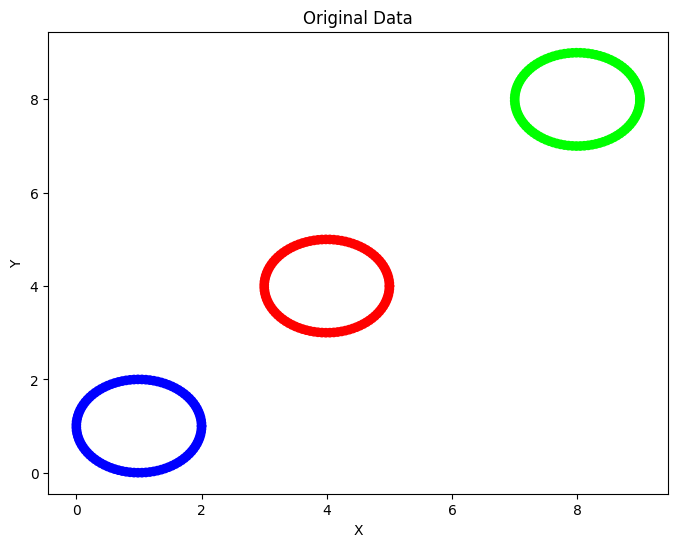

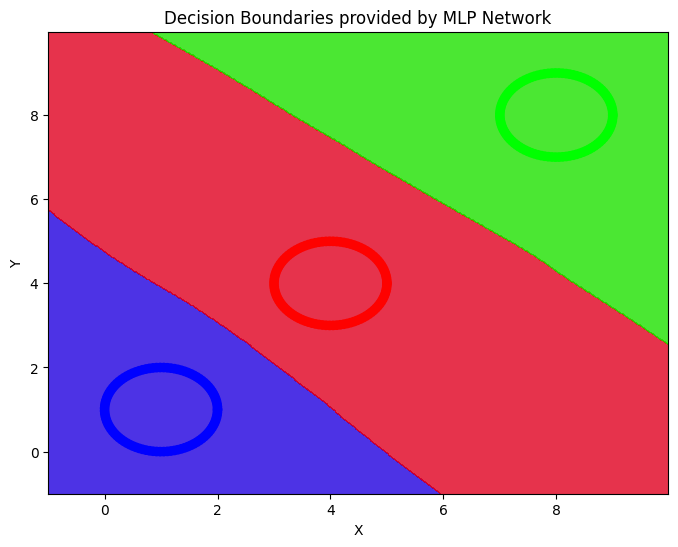

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

theta = np.linspace(0 , 2 * np.pi , 100)

X_class1 = np.column_stack((1 + np.cos(theta), 1 + np.sin(theta)))

X_class2 = np.column_stack((4 + np.cos(theta), 4 + np.sin(theta)))

X_class3 = np.column_stack((8 + np.cos(theta), 8 + np.sin(theta)))

y_class1 = np.zeros(len(X_class1))
y_class2 = np.ones(len(X_class2))
y_class3 = 2 * np.ones(len(X_class3))

X = np.vstack((X_class1, X_class2, X_class3))
y = np.hstack((y_class1, y_class2, y_class3))

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

mlp = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000))
mlp.fit(X, y)

h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.brg)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg)
plt.title('Decision Boundaries provided by MLP Network')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

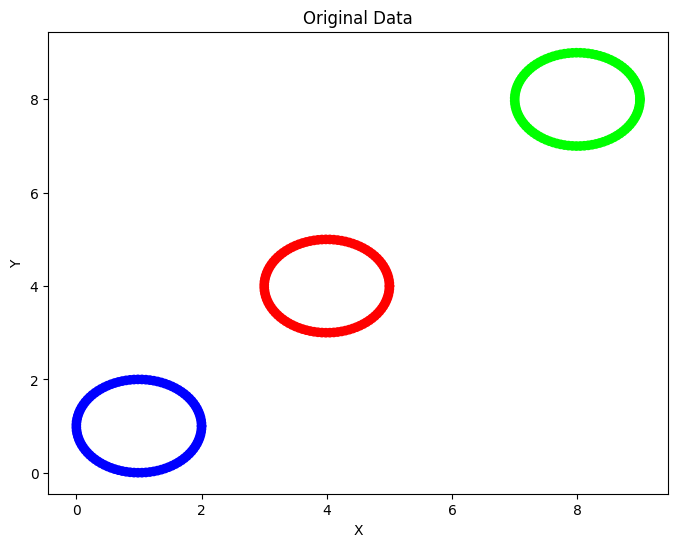

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


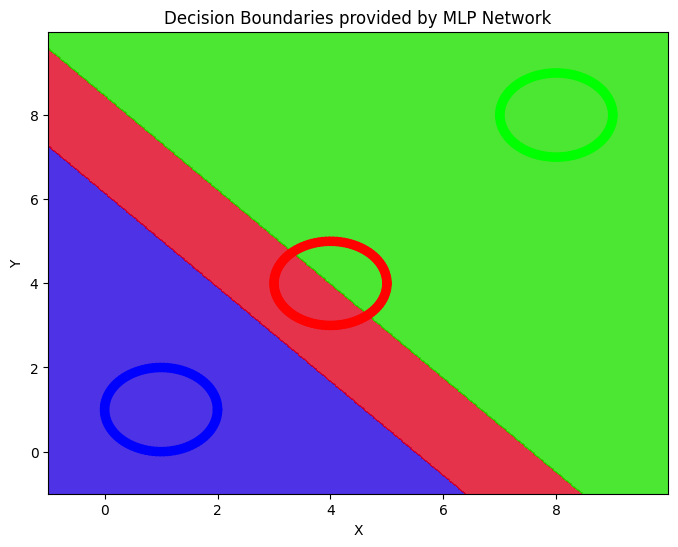

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

theta = np.linspace(0, 2*np.pi, 100)

X_class1 = np.column_stack((1 + np.cos(theta), 1 + np.sin(theta)))

X_class2 = np.column_stack((4 + np.cos(theta), 4 + np.sin(theta)))

X_class3 = np.column_stack((8 + np.cos(theta), 8 + np.sin(theta)))

y_class1 = np.zeros(len(X_class1))
y_class2 = np.ones(len(X_class2))
y_class3 = 2 * np.ones(len(X_class3))


X = np.vstack((X_class1, X_class2, X_class3))
y = np.hstack((y_class1, y_class2, y_class3))

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg)
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

mlp = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(1,), max_iter=1000))
mlp.fit(X, y)

h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.brg)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg)
plt.title('Decision Boundaries provided by MLP Network')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Epoch [100/1000], Loss: 0.0508
Epoch [200/1000], Loss: 0.0287
Epoch [300/1000], Loss: 0.0137
Epoch [400/1000], Loss: 0.0039
Epoch [500/1000], Loss: 0.0008
Epoch [600/1000], Loss: 0.0001
Epoch [700/1000], Loss: 0.0000
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000


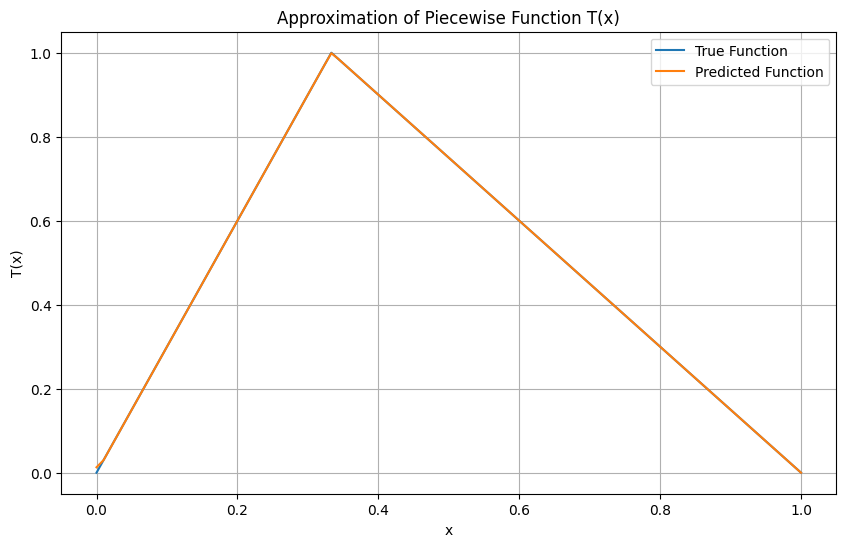

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

def piecewise_function(x):
    if isinstance(x, np.ndarray):
        x = torch.from_numpy(x).float()

    elif isinstance(x, float) or isinstance(x, int):
        x = torch.tensor([x]).float()
    else:
        raise ValueError("Input must be a numpy array, float, or int.")

    result = torch.zeros_like(x)
    mask1 = (x >= 0) & (x < 1/3)
    mask2 = (x >= 1/3) & (x < 1)

    result[mask1] = 3 * x[mask1]
    result[mask2] = 1.5 * (1 - x[mask2])
    return result.numpy()

x = np.linspace(0, 1, 100)
y_true = piecewise_function(x)


x_tensor = torch.from_numpy(x[:, np.newaxis]).float()
y_true_tensor = torch.from_numpy(y_true[:, np.newaxis]).float()


input_size = 1
hidden_size = 10
output_size = 1

model = MLP(input_size, hidden_size, output_size)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 1000
for epoch in range(num_epochs):
    outputs = model(x_tensor)
    loss = criterion(outputs, y_true_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plotting
model.eval()
with torch.no_grad():
    y_pred = model(x_tensor).numpy()

plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label='True Function')
plt.plot(x, y_pred, label='Predicted Function')
plt.xlabel('x')
plt.ylabel('T(x)')
plt.title('Approximation of Piecewise Function T(x)')
plt.legend()
plt.grid(True)
plt.show()


Epoch [100/1000], Loss: 0.0537
Epoch [200/1000], Loss: 0.0299
Epoch [300/1000], Loss: 0.0223
Epoch [400/1000], Loss: 0.0181
Epoch [500/1000], Loss: 0.0154
Epoch [600/1000], Loss: 0.0134
Epoch [700/1000], Loss: 0.0118
Epoch [800/1000], Loss: 0.0107
Epoch [900/1000], Loss: 0.0097
Epoch [1000/1000], Loss: 0.0089


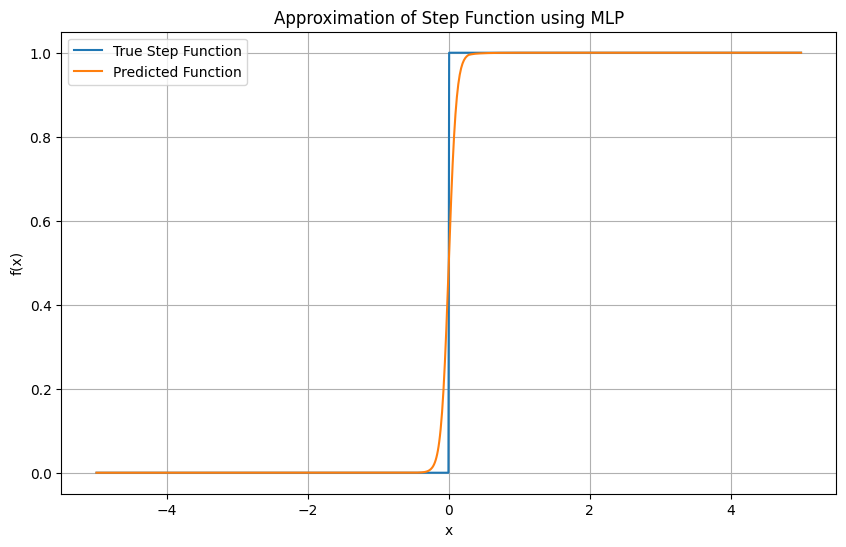

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x


x_train = torch.tensor(np.linspace(-5, 5, 1000), dtype=torch.float32)[:, np.newaxis]
y_train = (x_train >= 0).float()

model = MLP()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


model.eval()
with torch.no_grad():
    y_pred = model(x_train).numpy()

plt.figure(figsize=(10, 6))
plt.plot(x_train.numpy(), y_train.numpy(), label='True Step Function')
plt.plot(x_train.numpy(), y_pred, label='Predicted Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Approximation of Step Function using MLP')
plt.legend()
plt.grid(True)
plt.show()


# Question(3)


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2407 - accuracy: 0.9304 - val_loss: 0.1235 - val_accuracy: 0.9618
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1011 - accuracy: 0.9693 - val_loss: 0.0949 - val_accuracy: 0.9705
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0719 - accuracy: 0.9779 - val_loss: 0.0832 - val_accuracy: 0.9727
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0535 - accuracy: 0.9830 - val_loss: 0.0713 - val_accuracy: 0.9775
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0414 - accuracy: 0.9863 - val_loss: 0.0763 - val_accuracy: 0.9780
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0346 - accuracy: 0.9883 - val_loss: 0.0831 - val_accuracy: 0.9787
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0282 - accuracy: 0.9904 - val_loss: 0.0760 - val_accuracy:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

# Create the LeNet model
model2 = Sequential([
    Conv2D(6, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)),
    AveragePooling2D(pool_size=(2, 2), strides=2),
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    AveragePooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(120, activation='sigmoid'),
    Dense(84, activation='sigmoid'),
    Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model2.evaluate(X_test, y_test)
print('Test accuracy : ', test_acc)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_3 (Flatten)         (None, 400)               0         
                                                                 
 dense_9 (Dense)             (None, 120)              

1/1 [==============================] - 0s 21ms/step
Model Predictions for Original Image : 
1
Model Predictions for Shifted Image:
9
Model2 Predictions for Original Image:
1
Model2 Predictions for Shifted Image:
4


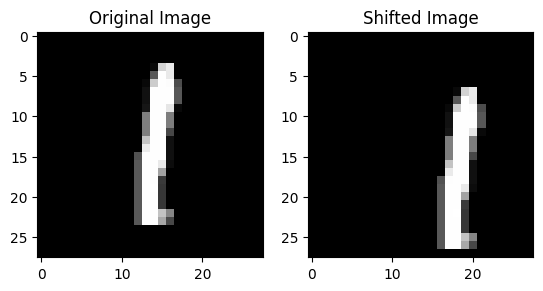

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

random_index = np.random.randint(0, X_test.shape[0])
image = X_test[random_index]


shifted_image = np.roll(image, shift=(3, 4), axis=(0, 1))

image = image.reshape(28, 28, 1)
shifted_image = shifted_image.reshape(28, 28, 1)


result_original = model.predict(np.expand_dims(image, axis=0))
result_shifted = model.predict(np.expand_dims(shifted_image, axis=0))

result_original2 = model2.predict(np.expand_dims(image, axis=0))
result_shifted2 = model2.predict(np.expand_dims(shifted_image, axis=0))

print("Model Predictions for Original Image : ")
print(np.argmax(result_original))
print("Model Predictions for Shifted Image:")
print(np.argmax(result_shifted))

print("Model2 Predictions for Original Image:")
print(np.argmax(result_original2))
print("Model2 Predictions for Shifted Image:")
print(np.argmax(result_shifted2))

plt.subplot(1, 2, 1)
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(shifted_image.reshape(28, 28), cmap='gray')
plt.title('Shifted Image')

plt.show()

# Question(4)

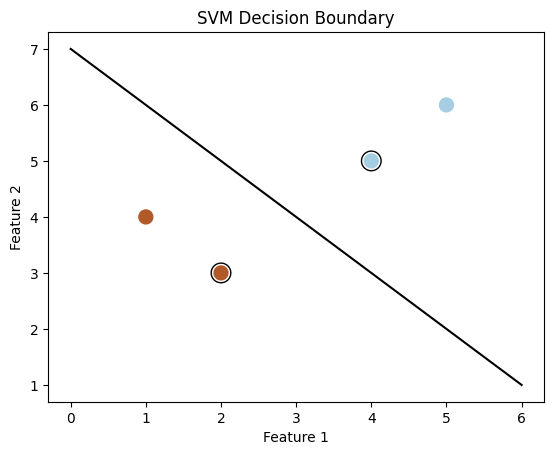

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC


X = np.array([[1, 4], [2, 3], [5, 6], [4, 5]])
y = np.array([1, 1, -1, -1])


svm_model = SVC(kernel='linear', C=1000)
svm_model.fit(X, y)


weight = svm_model.coef_[0]
bias = svm_model.intercept_[0]


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', s=100)


xx = np.linspace(0, 6)
yy = -weight[0] / weight[1] * xx - bias / weight[1]
plt.plot(xx, yy, 'k-')


plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
            s=200, facecolors='none', edgecolors='k')


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()

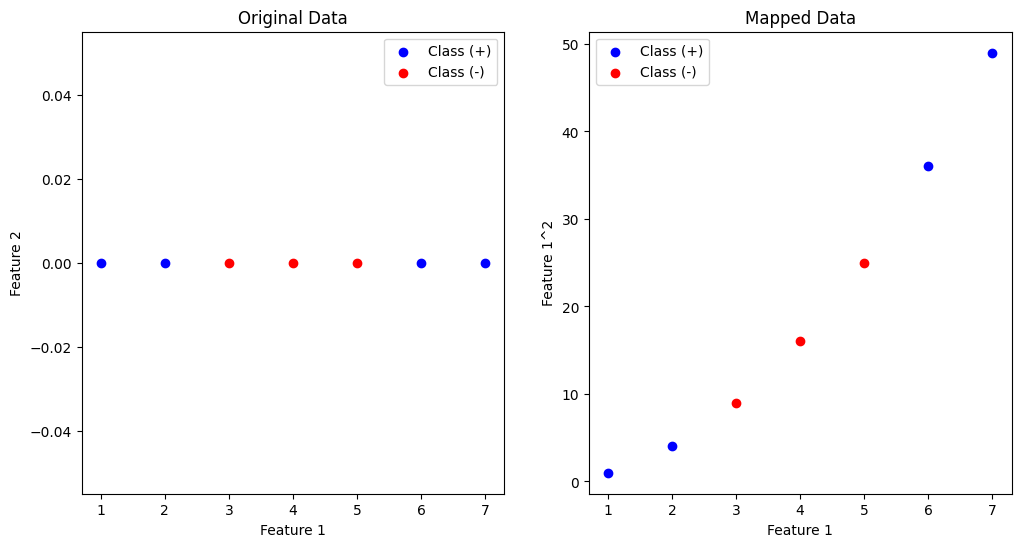

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X_pos = np.array([[1, 0], [2, 0], [6, 0], [7, 0]])
X_neg = np.array([[3, 0], [4, 0], [5, 0]])

X_pos_mapped = np.c_[X_pos, X_pos[:,0]**2]
X_neg_mapped = np.c_[X_neg, X_neg[:,0]**2]

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(X_pos[:, 0], X_pos[:, 1], c='b', label='Class (+)')
plt.scatter(X_neg[:, 0], X_neg[:, 1], c='r', label='Class (-)')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(122)
plt.scatter(X_pos_mapped[:, 0], X_pos_mapped[:, 2], c='b', label='Class (+)')
plt.scatter(X_neg_mapped[:, 0], X_neg_mapped[:, 2], c='r', label='Class (-)')
plt.title('Mapped Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 1^2')
plt.legend()

plt.show()


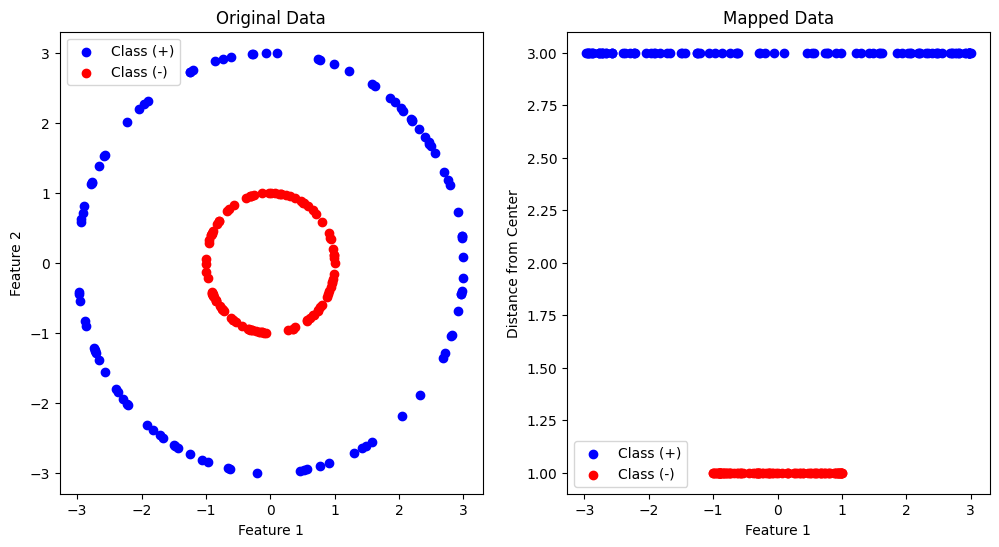

In [4]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)
r_pos = 3
theta_pos = 2 * np.pi * np.random.rand(100)
X_pos = np.column_stack((r_pos * np.cos(theta_pos), r_pos * np.sin(theta_pos)))

r_neg = 1
theta_neg = 2 * np.pi * np.random.rand(100)
X_neg = np.column_stack((r_neg * np.cos(theta_neg), r_neg * np.sin(theta_neg)))

X_pos_mapped = np.c_[X_pos, np.linalg.norm(X_pos, axis=1)]
X_neg_mapped = np.c_[X_neg, np.linalg.norm(X_neg, axis=1)]


plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(X_pos[:, 0], X_pos[:, 1], c='b', label='Class (+)')
plt.scatter(X_neg[:, 0], X_neg[:, 1], c='r', label='Class (-)')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()


plt.subplot(122)
plt.scatter(X_pos_mapped[:, 0], X_pos_mapped[:, 2], c = 'b', label = 'Class (+)')
plt.scatter(X_neg_mapped[:, 0], X_neg_mapped[:, 2], c = 'r', label = 'Class (-)')
plt.title('Mapped Data')
plt.xlabel('Feature 1')
plt.ylabel('Distance from Center')
plt.legend()

plt.show()

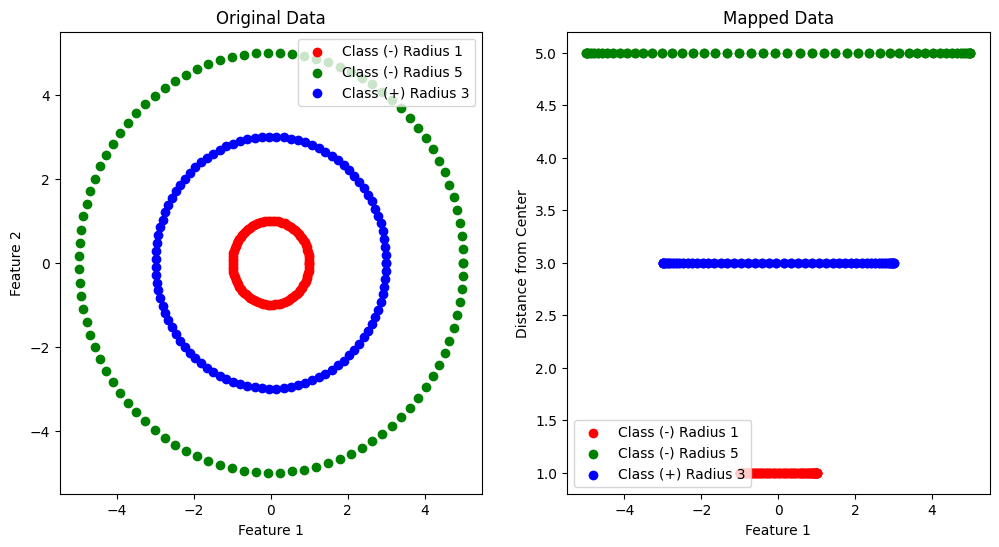

In [5]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2 * np.pi, 100)

X_neg1 = np.column_stack((np.cos(theta), np.sin(theta)))
X_neg2 = 5 * np.column_stack((np.cos(theta), np.sin(theta)))

X_pos = 3 * np.column_stack((np.cos(theta), np.sin(theta)))

X_neg1_mapped = np.c_[X_neg1, np.linalg.norm(X_neg1, axis=1)]
X_neg2_mapped = np.c_[X_neg2, np.linalg.norm(X_neg2, axis=1)]
X_pos_mapped = np.c_[X_pos, np.linalg.norm(X_pos, axis=1)]

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(X_neg1[:, 0], X_neg1[:, 1], c='r', label='Class (-) Radius 1')
plt.scatter(X_neg2[:, 0], X_neg2[:, 1], c='g', label='Class (-) Radius 5')
plt.scatter(X_pos[:, 0], X_pos[:, 1], c='b', label='Class (+) Radius 3')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()


plt.subplot(122)
plt.scatter(X_neg1_mapped[:, 0], X_neg1_mapped[:, 2], c='r', label='Class (-) Radius 1')
plt.scatter(X_neg2_mapped[:, 0], X_neg2_mapped[:, 2], c='g', label='Class (-) Radius 5')
plt.scatter(X_pos_mapped[:, 0], X_pos_mapped[:, 2], c='b', label='Class (+) Radius 3')
plt.title('Mapped Data')
plt.xlabel('Feature 1')
plt.ylabel('Distance from Center')
plt.legend()

plt.show()

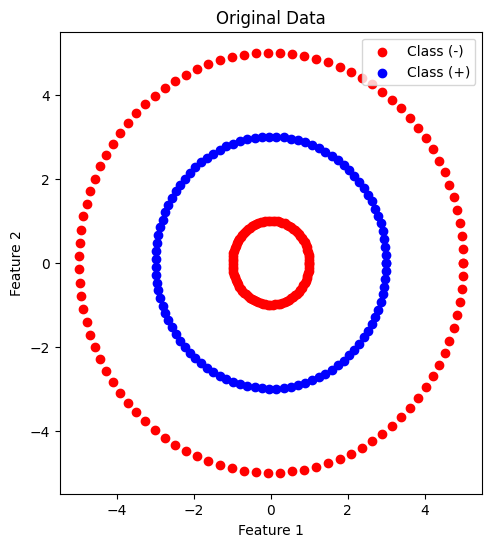

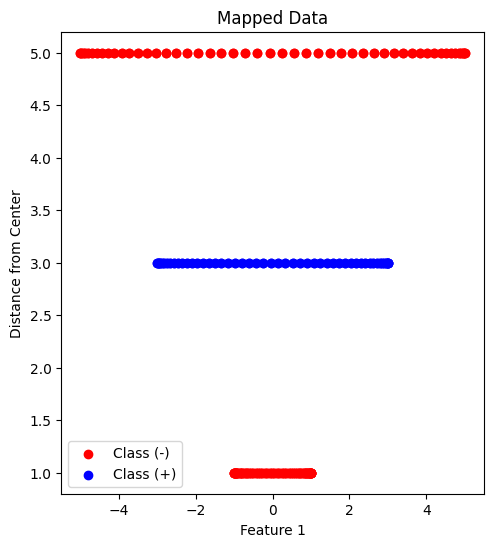

In [6]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2 * np.pi, 100)

X_neg1 = np.column_stack((np.cos(theta), np.sin(theta)))
X_neg2 = 5 * np.column_stack((np.cos(theta), np.sin(theta)))

X_pos = 3 * np.column_stack((np.cos(theta), np.sin(theta)))

X_neg = np.vstack((X_neg1, X_neg2))


X_neg_mapped = np.c_[X_neg, np.linalg.norm(X_neg, axis=1)]
X_pos_mapped = np.c_[X_pos, np.linalg.norm(X_pos, axis=1)]

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(X_neg[:, 0], X_neg[:, 1], c='r', label='Class (-)')
plt.scatter(X_pos[:, 0], X_pos[:, 1], c='b', label='Class (+)')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()


plt.figure(figsize=(12, 6))
plt.subplot(122)
plt.scatter(X_neg_mapped[:, 0], X_neg_mapped[:, 2], c='r', label='Class (-)')
plt.scatter(X_pos_mapped[:, 0], X_pos_mapped[:, 2], c='b', label='Class (+)')
plt.title('Mapped Data')
plt.xlabel('Feature 1')
plt.ylabel('Distance from Center')
plt.legend()
plt.show()

# Question(6)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Fetch MNIST dataset from openml.org repository
mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(56000, 784)
(14000, 784)


In [ ]:
X_train = X_train[:5600]
y_train = y_train[:5600]

X_test = X_test[:1400]
y_test = y_test[:1400]

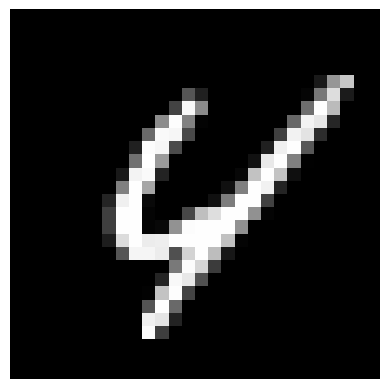

In [ ]:
# Function to display the number image
def display_number_image(image):
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()

image_row = X_train.iloc[1].values
display_number_image(image_row)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the SVM linear classifier on test set:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

print('--------------------------------------')


svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred = svm_rbf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the SVM linear classifier on test set:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

print('--------------------------------------')


svm_poly = SVC(kernel='poly', degree=2)
svm_poly.fit(X_train, y_train)
y_pred = svm_poly.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the SVM poly classifier on test set:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

print('-----------------------------------------')


parameters = {'kernel': ('linear', 'rbf', 'poly'), 'C': [0.1, 1, 10]}
grid_search = GridSearchCV(SVC(), parameters)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Accuracy of the SVM linear classifier on test set: 0.91
Confusion Matrix:
 [[137   0   0   1   0   1   0   0   0   0]
 [  0 137   0   3   0   0   0   0   0   0]
 [  1   0 112   5   3   0   2   0   2   1]
 [  0   2  10 139   0   6   0   2   4   1]
 [  0   0   2   2 101   1   0   1   0   4]
 [  1   2   0   5   2 121   1   0   1   0]
 [  3   1   3   0   0   2 131   1   0   0]
 [  0   1   4   0   0   1   0 135   1   2]
 [  2   4   3   3   2   5   3   0 120   1]
 [  1   0   4   1   7   0   0   4   1 141]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       139
           1       0.93      0.98      0.95       140
           2       0.81      0.89      0.85       126
           3       0.87      0.85      0.86       164
           4       0.88      0.91      0.89       111
           5       0.88      0.91      0.90       133
           6       0.96      0.93      0.94       141
           7       0.94      0.94    

KeyboardInterrupt: 

In [ ]:
parameters = {'kernel': ('linear', 'rbf', 'poly'), 'C': [0.1, 1, 10]}
grid_search = GridSearchCV(SVC(), parameters)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters found:  {'C': 10, 'kernel': 'rbf'}
Best score:  0.9566071428571428
